# Dynamic Ride Pricing

### Overview
A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

### Dataset
The dataset provided for this project contains historical ride data and includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides. These features will serve as the basis for developing the dynamic pricing model. You can download the data from [**here**](#https://statso.io/dynamic-pricing-case-study/).

### Objectives
1. Develop a predictive model that accurately estimates optimal fares for rides based on real-time market conditions and historical data.
2. Investigate the impact of various factors such as demand patterns, supply availability, and customer attributes on ride fares.
3. Implement a dynamic pricing strategy that adjusts fares in response to changing factors to maximize revenue and customer satisfaction.

### Methodology
1. **Data Collection and Preprocessing**: Gather comprehensive datasets and preprocess them by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering**: Extract relevant features and potentially create new ones to enhance the predictive power of the model, considering factors such as demand patterns and supply availability.
3. **Model Selection**: Explore various machine learning algorithms, including regression and ensemble methods, to identify the optimal model for dynamic pricing prediction.
4. **Model Training and Evaluation**: Train the selected model on the preprocessed dataset and evaluate its performance using appropriate metrics such as mean absolute error and root mean squared error.
5. **Dynamic Pricing Implementation**: Implement the trained model to dynamically adjust fares in real-time based on changing market conditions, demand patterns, and supply availability, ensuring optimal pricing for each ride.

### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
5. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
6. [**Model Training**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
7. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.


### Libraries

In [21]:
# ! pip install pandas numpy scikit-learn matplotlib seaborn xgboost catboost scipy dill

In [22]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

# <a id='first'></a> Loading Data

In [23]:
# Path to the CSV data file
TRAIN_DATAPATH = "../data/dynamic_pricing_raw.csv" 

# Reading data from the CSV file into a DataFrame using the first column as the index
df = pd.read_csv(TRAIN_DATAPATH)

# Displaying the first few rows of the DataFrame
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [24]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in df.columns:
    # Check if column data type is object
    if df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, df[col].nunique(), df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, df[col].nunique(), df[col].isna().sum(), df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Categorical_columns': [x[0] for x in obj],
    'cat_cols_uniques': [x[1] for x in obj],
    'cat_cols_missing': [x[2] for x in obj],
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)

,Categorical_columns,cat_cols_uniques,cat_cols_missing,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,Location_Category,3,0,Number_of_Riders,81,0,0.002167
1,Customer_Loyalty_Status,3,0,Number_of_Drivers,79,0,0.963204
2,Time_of_Booking,4,0,Number_of_Past_Rides,101,0,-0.008457
3,Vehicle_Type,2,0,Average_Ratings,151,0,-0.078754
4,,,,Expected_Ride_Duration,171,0,-0.139868
5,,,,Historical_Cost_of_Ride,1000,0,0.209580


Based on the analysis of the dataset:

- The dataset consists of 1000 entries with no missing values across all columns.
- It comprises both categorical and numerical features:
  - **Categorical Columns**:
    1. **Location_Category**: Represents the category of the ride location.
      - Unique Values: 3
      
    2. **Customer_Loyalty_Status**: Indicates the loyalty status of the customer.
      - Unique Values: 3
      
    3. **Time_of_Booking**: Indicates the time at which the ride was booked.
      - Unique Values: 4
      
    4. **Vehicle_Type**: Represents the type of vehicle used for the ride.
      - Unique Values: 2
      
  - **Numerical Columns**:
    1. **Number_of_Riders**: Indicates the number of riders for the ride.
      - Unique Values: 81
      
    2. **Number_of_Drivers**: Indicates the number of drivers available for the ride.
      - Unique Values: 79
      
    3. **Number_of_Past_Rides**: Represents the number of past rides taken by the customer.
      - Unique Values: 101
      
    4. **Average_Ratings**: Represents the average ratings received by the ride service.
      - Unique Values: 151
      
    5. **Expected_Ride_Duration**: Indicates the expected duration of the ride in minutes.
      - Unique Values: 171
      
    6. **Historical_Cost_of_Ride**: Represents the historical cost of the ride.
      - Unique Values: 1000

- The dataset provides a solid foundation for developing a dynamic pricing model for ride-sharing services. By leveraging both categorical and numerical features, the model can predict optimal fares based on real-time market conditions and historical data.


In [25]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(1000, 10)


# <a id='second'></a> Data Preprocessing

In [26]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [27]:
# Displaying the data types of each column in the DataFrame
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [28]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [29]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

# <a id='third'></a> Exploratory Data Analysis

In [30]:
# Generate descriptive statistics for all numerical columns
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [31]:
# Generate descriptive statistics for categorical columns
df.describe(include='object')

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


### Visualising Categorical and Numerical features distributions

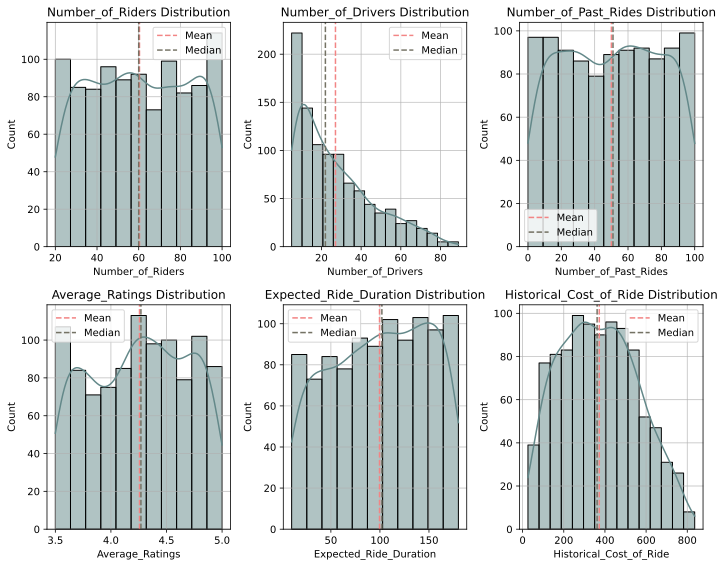

In [32]:
# Select numerical columns from the DataFrame
numerics = df.select_dtypes(include='number')

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    mean_values = numerics[col].mean()
    median = numerics[col].median()

    sns.histplot(numerics[col], kde=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{col} Distribution')  # Set title for the subplot
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

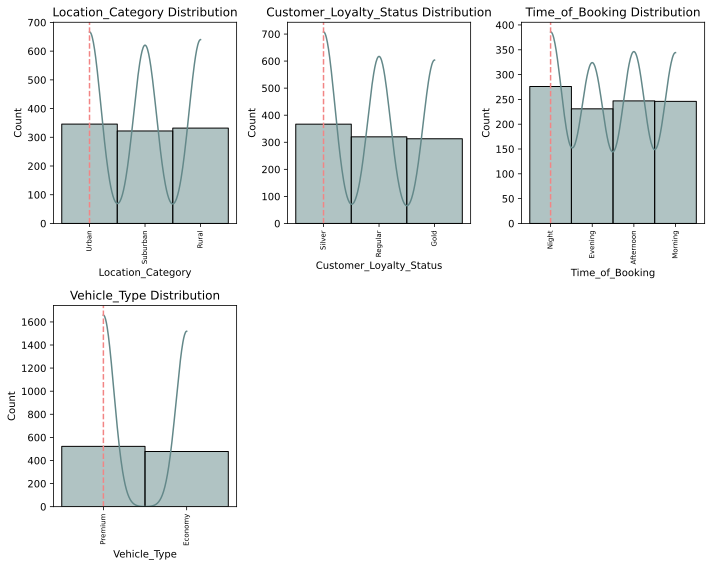

In [33]:
# Select categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(categorical_cols)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))

# Iterate over each categorical column and create a histogram subplot
for i, col in enumerate(df[categorical_cols], 1):
    mode = df[col].mode()[0]    
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    sns.histplot(df[col], kde=True, color='#638889')  # Plot histogram using seaborn

    plt.axvline(x=mode, color='#F28585', linestyle='--', label='Mode')

    plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
    plt.title(f'{col} Distribution')  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots


### Outliers and Inconsistent Data

### Z-score Plot for Numerical Columns

This code snippet generates a series of subplots to visualize the distribution of Z-scores for each numerical column in the dataset. Z-score, also known as standard score, measures how many standard deviations an observation is from the mean. 

#### Steps:
1. **Select Numerical Columns**: Only the numerical columns are selected from the dataset using `select_dtypes` function.

2. **Calculate Plot Layout**: The number of subplots, rows, and columns are calculated based on the number of numerical columns.

3. **Set Figure Size**: The size of the figure is adjusted based on the number of rows.

4. **Iterate Through Numerical Columns**: For each numerical column, a subplot is created. Z-scores are calculated for each column and plotted against the index. A threshold line is drawn at Z-score of 3 and -3 to indicate outliers.

#### Interpretation:
- Points above the red dashed line (Z-score > 3) or below the red dashed line (Z-score < -3) are considered outliers.
- This visualization helps in identifying potential outliers in the dataset for each numerical feature.



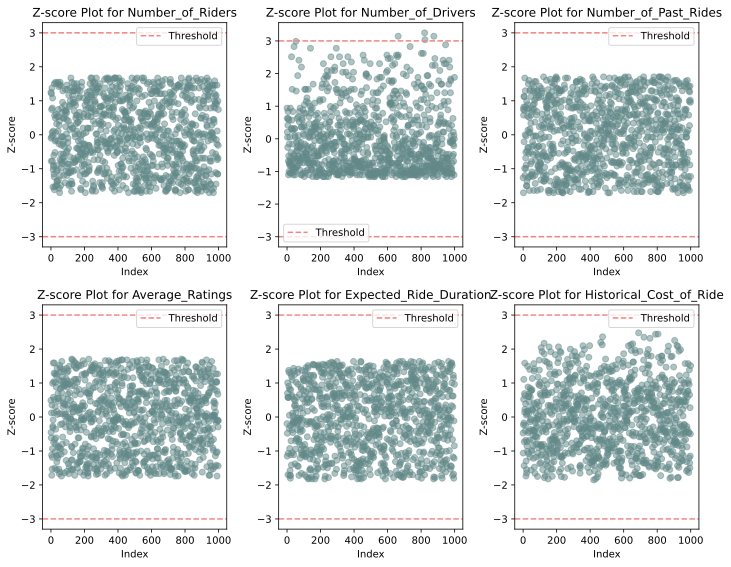

In [34]:
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))

for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  
    z_scores = (numerics[col] - numerics[col].mean()) / numerics[col].std()

    threshold = 3

    plt.scatter(np.arange(len(z_scores)), z_scores, color='#638889', alpha=0.5)
    plt.axhline(y=threshold, color='#F28585', linestyle='--', label='Threshold')
    plt.axhline(y=-threshold, color='#F28585', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Z-score')
    plt.title(f'Z-score Plot for {col}')
    plt.legend()

plt.tight_layout()
plt.show()

### Visualising correlation

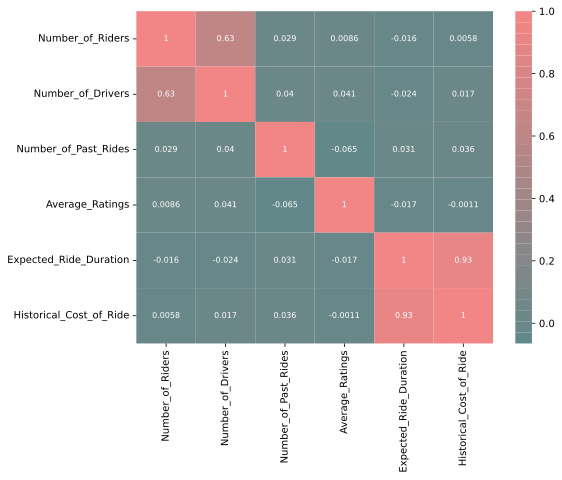

In [35]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix for numerical columns in the dataframe
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, 
            cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788',
                  '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787',
                  '#948687', '#998687', '#9e8687', '#a38687', '#a88687',
                  '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
                  '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585',
                  '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'], annot_kws={"fontsize":8})

# Show the plot
plt.show()

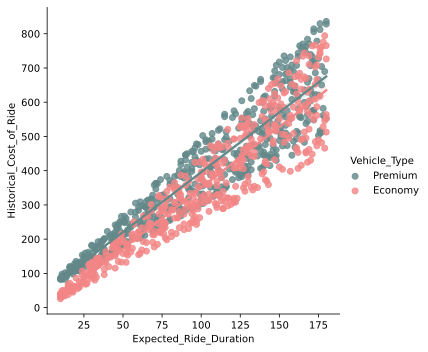

In [36]:
# Create a scatter plot with linear regression lines using seaborn's lmplot
sns.lmplot(data=df, y='Historical_Cost_of_Ride', x='Expected_Ride_Duration', hue='Vehicle_Type', 
           palette=['#638889', '#f28585'])

# Show the plot
plt.show()